In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import pandas as pd

In [3]:
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_data_6.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_data_6.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

read_x_data
read_y_data
[[-1.01460873  0.23409447 -0.16630924 -1.02176133  0.25902852 -0.14931563
  -1.02396726  0.27719386 -0.13220564 -1.02269015  0.29002349 -0.11629751
  -0.96906782  0.18514726 -0.16529225 -0.98205803  0.21180485 -0.15874543
  -0.99150532  0.23450866 -0.14900263 -0.99752507  0.25303335 -0.13762288
  -0.93519174  0.15578443 -0.14986314 -0.94776464  0.17814166 -0.15095246
  -0.95897173  0.19944917 -0.14846165 -0.96824019  0.21880579 -0.14321308
  -0.91279739  0.14130178 -0.13163    -0.92284951  0.15821756 -0.1365968
  -0.93288245  0.17567057 -0.13877139 -0.9422943   0.19283404 -0.13836906]
 [-1.00498288  0.20985379 -0.17773116 -1.01682491  0.24067003 -0.16240927
  -1.02267372  0.26388508 -0.14521387 -1.02392852  0.28065612 -0.12830422
  -0.95707981  0.16277143 -0.16704625 -0.97244433  0.19176855 -0.16412556
  -0.984617    0.21755216 -0.156666   -0.99322451  0.23926248 -0.14640847
  -0.92524664  0.13882143 -0.1462578  -0.93824444  0.16110296 -0.15048023
  -0.95056639 

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)

(34992, 48) (34992, 7) training data size
(11664, 48) (11664, 7) Validation data size


In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from numpy import loadtxt
from keras.models import load_model


input_layer = Input(shape=(48,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'sensor_concept_nn')
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mse', optimizer=opt)


# define the keras model
'''model = Sequential()
model.add(Dense(500, input_dim=48, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(7, activation='linear'))

##Implementing Early stopping
#my_callbacks = [
#    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5),
#    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
#    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
#    tf.keras.callbacks.CSVLogger('Points_5_training.log')]


#for specific values of learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)

#compiling module
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])'''

# Display the model
model.summary()

Model: "sensor_concept_nn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48)]              0         
_________________________________________________________________
dense (Dense)                (None, 700)               34300     
_________________________________________________________________
dense_1 (Dense)              (None, 700)               490700    
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 4907      
Total params: 529,907
Trainable params: 529,907
Non-trainable params: 0
_________________________________________________________________


In [7]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [9]:
history = model.fit(xtrain_scale, ytrain_scale, epochs=30, verbose=2, validation_data=(xval_scale,yval_scale))


Epoch 1/30
1094/1094 - 11s - loss: 0.0811 - val_loss: 0.0650
Epoch 2/30
1094/1094 - 10s - loss: 0.0576 - val_loss: 0.0555
Epoch 3/30
1094/1094 - 10s - loss: 0.0481 - val_loss: 0.0503
Epoch 4/30
1094/1094 - 10s - loss: 0.0419 - val_loss: 0.0467
Epoch 5/30
1094/1094 - 10s - loss: 0.0372 - val_loss: 0.0431
Epoch 6/30
1094/1094 - 10s - loss: 0.0338 - val_loss: 0.0433
Epoch 7/30
1094/1094 - 10s - loss: 0.0310 - val_loss: 0.0413
Epoch 8/30
1094/1094 - 10s - loss: 0.0287 - val_loss: 0.0446
Epoch 9/30
1094/1094 - 11s - loss: 0.0267 - val_loss: 0.0426
Epoch 10/30
1094/1094 - 10s - loss: 0.0251 - val_loss: 0.0445
Epoch 11/30
1094/1094 - 10s - loss: 0.0237 - val_loss: 0.0486
Epoch 12/30
1094/1094 - 10s - loss: 0.0225 - val_loss: 0.0433
Epoch 13/30
1094/1094 - 10s - loss: 0.0214 - val_loss: 0.0472
Epoch 14/30
1094/1094 - 11s - loss: 0.0204 - val_loss: 0.0511
Epoch 15/30
1094/1094 - 10s - loss: 0.0195 - val_loss: 0.0562
Epoch 16/30
1094/1094 - 10s - loss: 0.0188 - val_loss: 0.0485
Epoch 17/30
1094/

In [21]:
#to evaluate on training data
#scores=model.evaluate(xtrain_scale,y_train_scale,verbose=0)
#print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#model.save("model.h5")
#print("saved the model to disk")
#to load model
#model=load_model('model.h5')
from keras.utils.vis_utils import plot_model
plot_model(history, show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


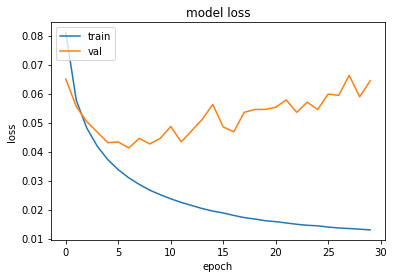

In [10]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#max in all columns of strain data
max_val=np.max(x_data)
min_val=np.min(x_data)
range_val = max_val-min_val
shape_x_data=np.shape(x_data)
err=0.01
x_data_noise=x_data+np.random.uniform(0,err*range_val,(shape_x_data[0],shape_x_data[1]))
#x_data_noise-x_data



In [ ]:
X_train, X_val, y_train, y_val = train_test_split(x_data_noise, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)


In [ ]:
history = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=1, validation_data=(xval_scale,yval_scale))


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('When noise is at 1% of the range of strain values')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim(0.01,0.07)
plt.show()

In [65]:
#Increasing the noise
err=0.1
x_data_noise_10=x_data+np.random.uniform(0,err*range_val,(shape_x_data[0],shape_x_data[1]))
X_train, X_val, y_train, y_val = train_test_split(x_data_noise_10, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)

history = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=1, validation_data=(xval_scale,yval_scale))


(34992, 48) (34992, 7) training data size
(11664, 48) (11664, 7) Validation data size
Epoch 1/20
1094/1094 [==============================] - 13s 12ms/step - loss: 0.0752 - val_loss: 0.0808
Epoch 2/20
1094/1094 [==============================] - 11s 10ms/step - loss: 0.0714 - val_loss: 0.0768
Epoch 3/20
1094/1094 [==============================] - 8s 8ms/step - loss: 0.0704 - val_loss: 0.0794
Epoch 4/20
1094/1094 [==============================] - 8s 8ms/step - loss: 0.0697 - val_loss: 0.0790
Epoch 5/20
1094/1094 [==============================] - 8s 8ms/step - loss: 0.0692 - val_loss: 0.0777
Epoch 6/20
1094/1094 [==============================] - 9s 8ms/step - loss: 0.0686 - val_loss: 0.0803
Epoch 7/20
1094/1094 [==============================] - 8s 8ms/step - loss: 0.0682 - val_loss: 0.0762
Epoch 8/20
1094/1094 [==============================] - 8s 8ms/step - loss: 0.0677 - val_loss: 0.0786
Epoch 9/20
1094/1094 [==============================] - 9s 8ms/step - loss: 0.0674 - val_loss:

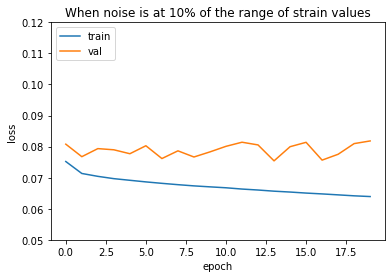

In [69]:
#
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('When noise is at 10% of the range of strain values')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim(0.05,0.12)
plt.show()

In [70]:
#Increasing the noise to 
err=0.3
x_data_noise_30=x_data+np.random.uniform(0,err*range_val,(shape_x_data[0],shape_x_data[1]))
X_train, X_val, y_train, y_val = train_test_split(x_data_noise_30, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)

history = model.fit(xtrain_scale, ytrain_scale, epochs=20, verbose=1, validation_data=(xval_scale,yval_scale))


(34992, 48) (34992, 7) training data size
(11664, 48) (11664, 7) Validation data size
Epoch 1/20
1094/1094 [==============================] - 14s 12ms/step - loss: 0.1057 - val_loss: 0.1051
Epoch 2/20
1094/1094 [==============================] - 14s 13ms/step - loss: 0.1027 - val_loss: 0.1037
Epoch 3/20
1094/1094 [==============================] - 12s 11ms/step - loss: 0.1018 - val_loss: 0.1036
Epoch 4/20
1094/1094 [==============================] - 11s 10ms/step - loss: 0.1012 - val_loss: 0.1036
Epoch 5/20
1094/1094 [==============================] - 10s 9ms/step - loss: 0.1006 - val_loss: 0.1039
Epoch 6/20
1094/1094 [==============================] - 9s 8ms/step - loss: 0.1000 - val_loss: 0.1039
Epoch 7/20
1094/1094 [==============================] - 8s 7ms/step - loss: 0.0995 - val_loss: 0.1036
Epoch 8/20
1094/1094 [==============================] - 9s 8ms/step - loss: 0.0989 - val_loss: 0.1040
Epoch 9/20
1094/1094 [==============================] - 8s 8ms/step - loss: 0.0984 - val_

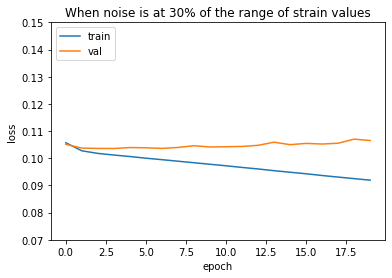

In [73]:
#
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('When noise is at 30% of the range of strain values')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim(0.07,0.15)
plt.show()